In [1]:
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (24,24)

[liste des projections](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html)

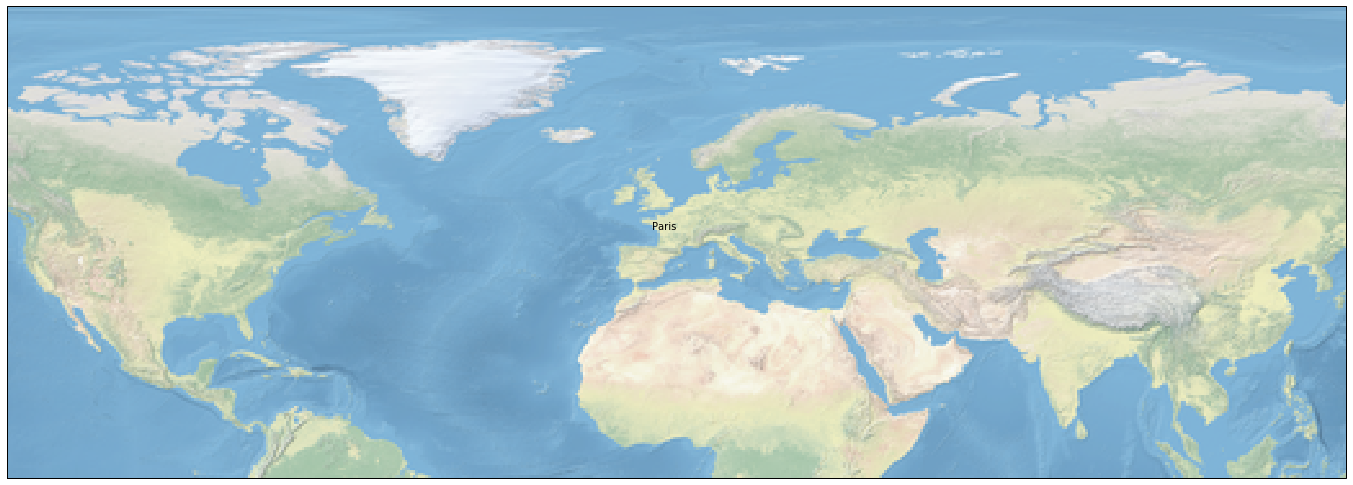

In [2]:
ax= plt.axes(projection= ccrs.PlateCarree())
paris_lon, paris_lat = 2.3, 48.8
half_size= 50
plt.text(paris_lon, paris_lat-2, "Paris", horizontalalignment='right', transform=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([paris_lon-half_size, paris_lon+half_size, paris_lat-half_size, paris_lat+half_size])

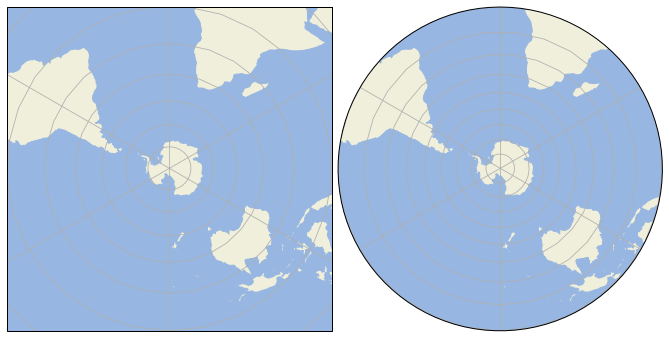

In [3]:
import numpy as np
import matplotlib.path as mpath
fig = plt.figure(figsize=[10, 5])
ax1 = plt.subplot(1, 2, 1, projection=ccrs.SouthPolarStereo())
ax2 = plt.subplot(1, 2, 2, projection=ccrs.SouthPolarStereo(), sharex=ax1, sharey=ax1)
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.04, right=0.95, wspace=0.02)

# Limit the map to -60 degrees latitude and below.
ax1.set_extent([-180, 180, -90, 0], ccrs.PlateCarree())

ax1.add_feature(cartopy.feature.LAND)
ax1.add_feature(cartopy.feature.OCEAN)
ax1.gridlines()
ax2.gridlines()

ax2.add_feature(cartopy.feature.LAND)
ax2.add_feature(cartopy.feature.OCEAN)

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax2.set_boundary(circle, transform=ax2.transAxes)

plt.show()

Malheureusement, [cartopy n'a pas](https://github.com/SciTools/cartopy/issues/1376) toutes [les projections imaginables](https://pubs.usgs.gov/pp/1453/report.pdf) (en fait, cartopy se repose sur  [PROJ](https://proj.org/about.html) ).

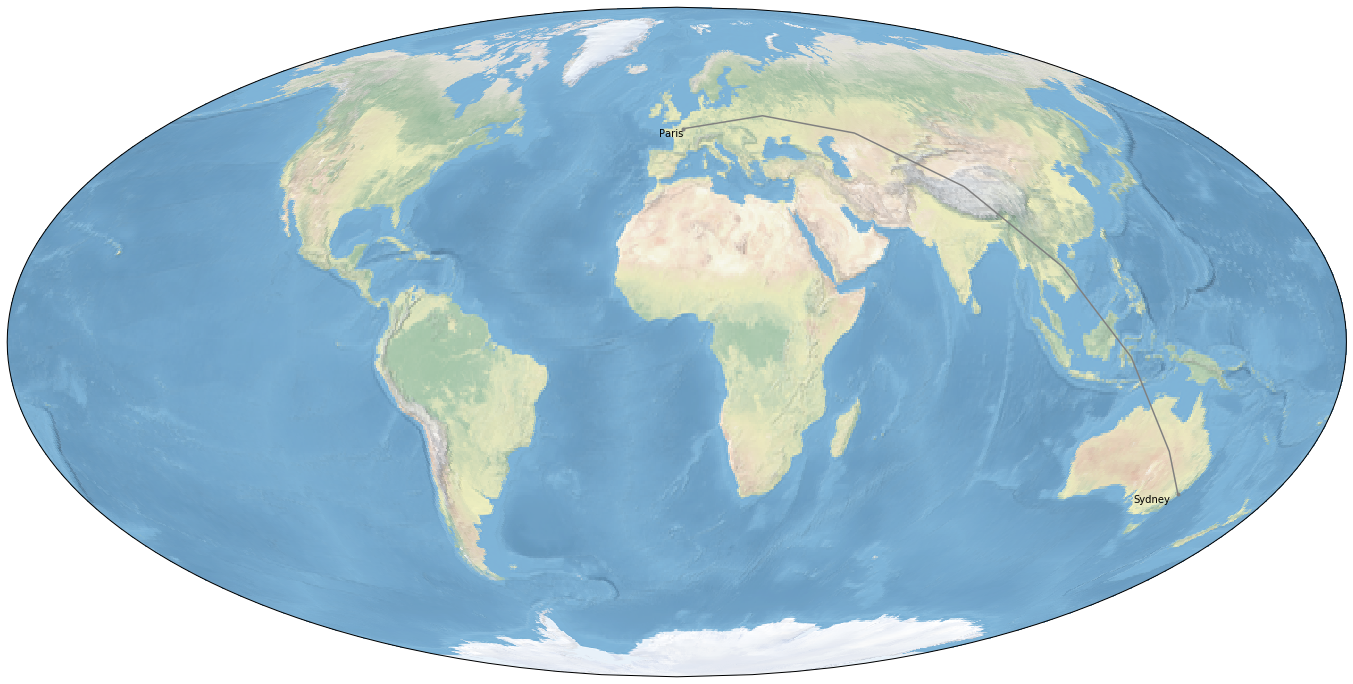

In [4]:
ax= plt.axes(projection= ccrs.Mollweide())
ax.stock_img()
paris_lon, paris_lat = 2.3, 48.8
sydney_lon, sydney_lat = 151.2, -33.9

plt.text(paris_lon, paris_lat-2, "Paris", horizontalalignment='right', transform=ccrs.Geodetic())
plt.text(sydney_lon, sydney_lat-2, "Sydney", horizontalalignment='right', transform=ccrs.Geodetic())
plt.plot([paris_lon, sydney_lon], [paris_lat, sydney_lat], color='grey', linestyle="--", transform= ccrs.Mollweide())
plt.plot([paris_lon, sydney_lon], [paris_lat, sydney_lat], color='grey', marker=".", transform= ccrs.Geodetic())

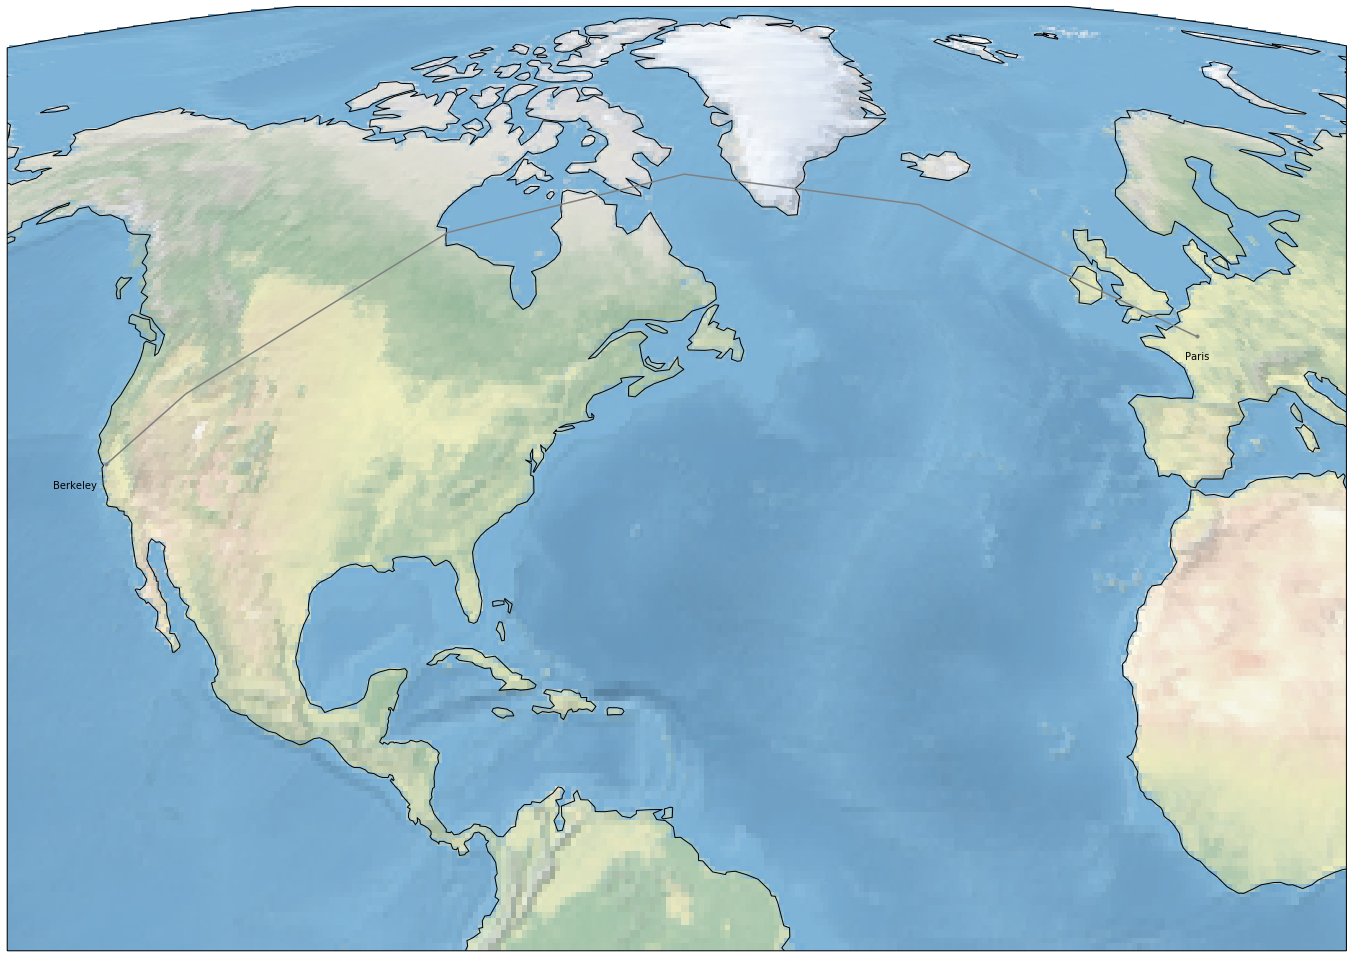

In [5]:
paris_lon, paris_lat = 2.3, 48.8

berkeley_lon, berkeley_lat=  -122.269524, 37.879985,

ax= plt.axes(projection= ccrs.Mollweide(central_longitude= (paris_lon+berkeley_lon)/2))

ax.stock_img()
ax.coastlines()
plt.text(paris_lon, paris_lat-2, "Paris", horizontalalignment='right', transform=ccrs.Geodetic())
plt.text(berkeley_lon, berkeley_lat-2, "Berkeley", horizontalalignment='right', transform=ccrs.Geodetic())
plt.plot([paris_lon, berkeley_lon], [paris_lat, berkeley_lat], color='grey', marker=".", transform= ccrs.Geodetic())

ax.set_extent([-123, 2, 0, 80])

In [6]:
#from cartopy.io.img_tiles import OSM
# https://github.com/SciTools/cartopy/issues/1341 !!
import cartopy.io.img_tiles
osm_tiles = cartopy.io.img_tiles.OSM()

In [7]:
osm_tiles.crs

[arbres remarquables de Paris](https://opendata.paris.fr/explore/dataset/arbresremarquablesparis/map/?location=12,48.85652,2.34892&basemap=jawg.streets)

In [8]:
import pandas as pd
import geopandas as gpd

Les serveurs de *tiles*, les images qui servent pour dessiner le fond des cartes, [bloquent les requêtes automatisées faites par cartopy](https://github.com/SciTools/cartopy/issues/1341). Il faut donc [patcher la bibliothèque](https://gist.github.com/bhugueney/80e224e8380afda1093220869af09fa9) et recharger le module:

In [9]:
import importlib
importlib.reload(cartopy.io.img_tiles)

<module 'cartopy.io.img_tiles' from '/home/bernard/anaconda3/lib/python3.7/site-packages/cartopy/io/img_tiles.py'>

https://opendata.paris.fr/explore/dataset/arbresremarquablesparis/information/
https://opendata.paris.fr/explore/dataset/les-arbres/information/

In [10]:
arbres_spe = pd.read_csv("./Data/Arbres_de_Paris/arbresremarquablesparis.csv",sep=";", header=0)
arbres_spe.columns

Index(['Geo point', 'GENRE', 'ESPECE', 'ADRESSE', 'IDBASE', 'TYPEEMPLACEMENT',
       'DOMANIALITE', 'ARRONDISSEMENT', 'COMPLEMENTADRESSE', 'NUMERO',
       'IDEMPLACEMENT', 'CIRCONFERENCE EN CM', 'HAUTEUR EN M',
       'STADEDEVELOPPEMENT', 'PEPINIERE', 'VARIETE OU CULTIVAR',
       'DATEPLANTATION', 'REMARQUABLE', 'OBJECTID', 'LIBELLEFRANCAIS'],
      dtype='object')

In [11]:
#from shapely.geometry import Point
#arbres_spe['geometry'] = arbres_spe['Geo point'].apply(lambda x: Point(eval(x)))
#arbres_spe.columns

In [12]:
arbres_spe['longitude']= arbres_spe['Geo point'].apply(lambda x : eval(x)[1])
arbres_spe['latitude']= arbres_spe['Geo point'].apply(lambda x : eval(x)[0])

In [13]:
arbres_spe['CIRCONFERENCE EN CM']

0      443.0
1      420.0
2      365.0
3      311.0
4      207.0
       ...  
177    478.0
178    408.0
179    195.0
180     49.0
181    349.0
Name: CIRCONFERENCE EN CM, Length: 182, dtype: float64

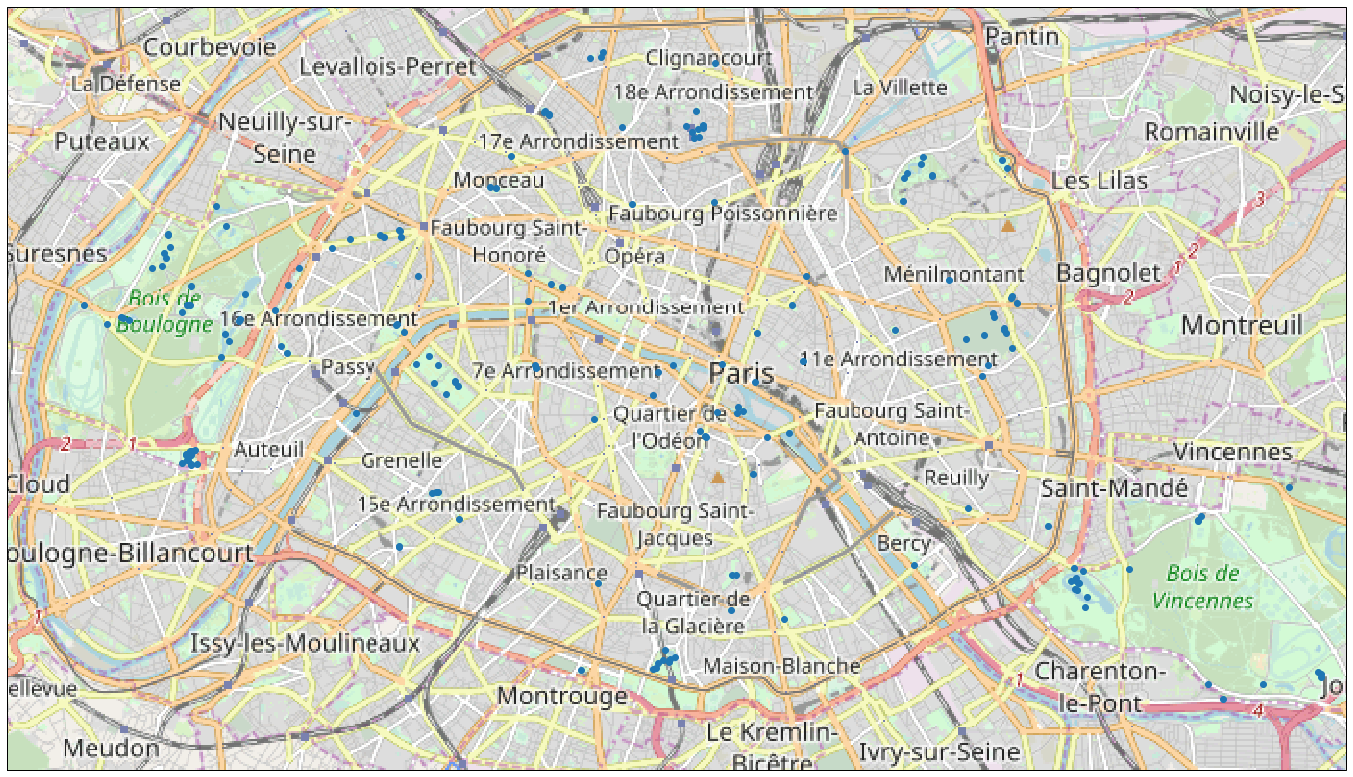

In [14]:
plt.figure(figsize=(24,24))

ax= plt.axes(projection = osm_tiles.crs)
# 48.818644, 2.465676
# 48.899279, 2.225146
ax.set_extent([2.22, 2.46, 48.81, 48.9], ccrs.PlateCarree())
ax.add_image(osm_tiles, 12)
ax.scatter('longitude', 'latitude', data=arbres_spe, transform = ccrs.PlateCarree())

In [15]:
arbres_all = pd.read_csv("./Data/Arbres_de_Paris/les-arbres.csv",sep=";", header=0)
arbres_all.columns

Index(['IDBASE', 'TYPEEMPLACEMENT', 'DOMANIALITE', 'ARRONDISSEMENT',
       'COMPLEMENTADRESSE', 'NUMERO', 'LIEU / ADRESSE', 'IDEMPLACEMENT',
       'LIBELLEFRANCAIS', 'GENRE', 'ESPECE', 'VARIETEOUCULTIVAR',
       'CIRCONFERENCEENCM', 'HAUTEUR (m)', 'STADEDEVELOPPEMENT', 'REMARQUABLE',
       'geo_point_2d'],
      dtype='object')

In [16]:
arbres_all['geo_point_2d'][0]

'48.85295823,2.3430044968'

In [17]:
arbres_all['geo_point_2d'][0].split(',')

['48.85295823', '2.3430044968']

In [18]:
arbres_all['latitude']= arbres_all['geo_point_2d'].apply(lambda x : eval(x.split(',')[0]))
arbres_all['longitude']= arbres_all['geo_point_2d'].apply(lambda x : eval(x.split(',')[1]))

In [ ]:
plt.figure(figsize=(24,24))

ax= plt.axes(projection = osm_tiles.crs)
# 48.818644, 2.465676
# 48.899279, 2.225146
ax.set_extent([2.22, 2.46, 48.81, 48.9], ccrs.PlateCarree())
ax.add_image(osm_tiles, 12)

#ax.scatter('longitude', 'latitude', data=arbres_all, s=2, color='green', transform = ccrs.PlateCarree())
ax.scatter('longitude', 'latitude', data=arbres_all, s=2, c='CIRCONFERENCEENCM', cmap = plt.cm.Greens, transform = ccrs.PlateCarree())

In [ ]:
arbres_all['CIRCONFERENCEENCM'].describe()

In [ ]:
import seaborn as sns
sns.distplot(arbres_all['CIRCONFERENCEENCM'], kde=False, rug=True);

In [ ]:
arbres_all['CIRCONFERENCEENCM'].isna().sum()

In [ ]:
circ_outlier = 10*100

In [ ]:
arbres_all['CIRCONFERENCEENCM'].loc[arbres_all['CIRCONFERENCEENCM'] > circ_outlier].count()

In [ ]:
import numpy as np
arbres_all.loc[arbres_all['CIRCONFERENCEENCM'] > circ_outlier, 'CIRCONFERENCEENCM'] = np.nan

In [ ]:
arbres_all['CIRCONFERENCEENCM'].isna().sum()

In [ ]:
arbres_all['CIRCONFERENCEENCM'].fillna(circ_outlier, inplace=True)

In [ ]:
arbres_all.loc[arbres_all['CIRCONFERENCEENCM'] == 0, 'CIRCONFERENCEENCM'] = np.nan

In [ ]:
arbres_all['CIRCONFERENCEENCM'].isna().sum()

In [ ]:
arbres_all['CIRCONFERENCEENCM'].describe()

In [ ]:
sns.distplot(arbres_all['CIRCONFERENCEENCM'].dropna(), kde=False, rug=True);

In [ ]:
arbres_all['CIRCONFERENCEENCM'].fillna(1, inplace=True)

In [ ]:
import matplotlib
plt.figure(figsize=(24,24))

ax= plt.axes(projection = osm_tiles.crs)
# 48.818644, 2.465676
# 48.899279, 2.225146
ax.set_extent([2.22, 2.46, 48.81, 48.9], ccrs.PlateCarree())
ax.add_image(osm_tiles, 12)

#ax.scatter('longitude', 'latitude', data=arbres_all, s=2, color='green', transform = ccrs.PlateCarree())
ax.scatter('longitude', 'latitude', data=arbres_all, s=2, c='CIRCONFERENCEENCM', cmap = plt.cm.Greens, transform = ccrs.PlateCarree(), norm=matplotlib.colors.LogNorm())

In [ ]:
from matplotlib.colors import ListedColormap

import geoplot as gplt


plt.figure(figsize=(24,24))
garbres_all = gpd.GeoDataFrame(
    arbres_all, geometry=gpd.points_from_xy(arbres_all.longitude, arbres_all.latitude))

ax= plt.axes(projection = osm_tiles.crs)
# 48.818644, 2.465676
# 48.899279, 2.225146
ax.set_extent([2.22, 2.46, 48.81, 48.9])#, ccrs.PlateCarree())
ax.add_image(osm_tiles, 12)

cmap = plt.cm.BuGn
my_cmap = cmap(np.arange(cmap.N))

# Set alpha
my_cmap[:,-1] = np.linspace(0.5, 1, cmap.N)

# Create new colormap
my_cmap = ListedColormap(my_cmap)

gplt.kdeplot(garbres_all, shade=True, shade_lowest=False, cbar=True,cmap=my_cmap, ax=ax, cbar_kws={'shrink' : 0.5})

In [ ]:
garbres_all = gpd.GeoDataFrame(
    arbres_all, geometry=gpd.points_from_xy(arbres_all.longitude, arbres_all.latitude))
garbres_all.columns

TODO https://opendata.paris.fr/explore/dataset/un-verger-dans-mon-ecole/map/?location=13,48.8605,2.33444&basemap=jawg.streets